THE GOAL OF THIS PROJECT IS TO FIND OUT WHETHER LOAN BORROWERS MEET THE COMPANIES CREDIT POLICIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# ABOUT THE DATASET

credit.policy if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose
The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational",
                         
int.rate
The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by
                         
                         
installment
The monthly installments owed by the borrower if the loan is funded.
                         
log.annual.inc
The natural log of the self-reported annual income of the borrower
                         
                         
dti
The debt-to-income ratio of the borrower (amount of debt divided by annual income).
                         
fico
The FICO credit score of the borrower.
                         

days.with.cr.line
The number of days the borrower has had a credit line.
                         
                         
revol.bal
The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
                         
                         
revol.util
The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

# DATA EXPLORATION 

In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
print(df.purpose.unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [6]:
df.shape

(9578, 14)

In [7]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
count = df['credit.policy'].value_counts()
count

credit.policy
1    7710
0    1868
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1eb0d1f6770>,
 [Text(-0.8999045323342553, 0.6325913631122904, '1'),
  Text(0.899904532334255, -0.6325913631122905, '0')],
 [Text(-0.4908570176368664, 0.3450498344248856, '80.50%'),
  Text(0.49085701763686634, -0.3450498344248857, '19.50%')])

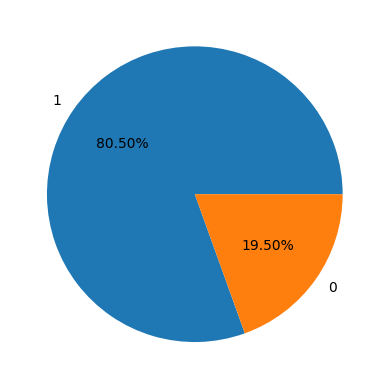

In [11]:
plt.pie(count,autopct='%0.2f%%',labels=(1,0))

In [12]:
coun= df['not.fully.paid'].value_counts()
coun

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1eb0d2a3640>,
 [Text(-0.963846990100347, 0.5300933688271358, '0'),
  Text(0.9638470397312656, -0.530093278585266, '1')],
 [Text(-0.5257347218729165, 0.289141837542074, '83.99%'),
  Text(0.5257347489443266, -0.2891417883192359, '16.01%')])

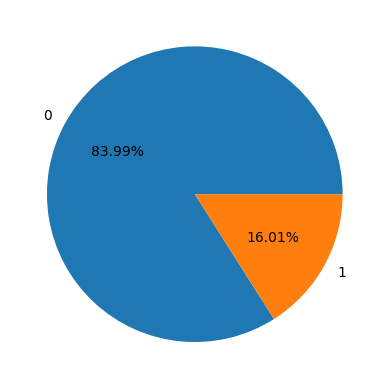

In [13]:
plt.pie(coun,autopct='%0.2f%%',labels=(0,1))

In [14]:
cou= df['pub.rec'].value_counts()
cou

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
Name: count, dtype: int64

In [15]:
co= df['purpose'].value_counts()
co

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1eb0d2eeec0>,
 [Text(0.29647429446485263, 1.0592936291329085, 'debt_consolidation'),
  Text(-1.073780056809919, -0.23873916645009743, 'all_other'),
  Text(-0.18990740537551504, -1.0834828920585409, 'credit_card'),
  Text(0.47522785504609, -0.9920476227421205, 'home_improvement'),
  Text(0.8308088480496708, -0.7209415080312542, 'small_business'),
  Text(1.0262170075026003, -0.3960791000701857, 'major_purchase'),
  Text(1.093045874490231, -0.12349379036974596, 'educational')],
 [Text(0.1617132515262832, 0.5777965249815864, '41.31%'),
  Text(-0.5856982128054103, -0.13022136351823493, '24.34%'),
  Text(-0.10358585747755364, -0.5909906683955677, '13.18%'),
  Text(0.25921519366150364, -0.5411168851320657, '6.57%'),
  Text(0.45316846257254767, -0.3932408225625023, '6.46%'),
  Text(0.5597547313650546, -0.21604314549282855, '4.56%'),
  Text(0.5962068406310349, -0.0673602492925887, '3.58%')])

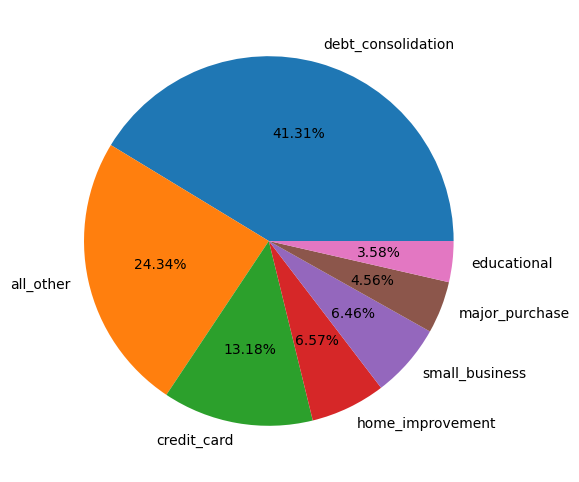

In [16]:
plt.figure(figsize=(10,6))
plt.pie(co,autopct='%0.2f%%',labels=(
    'debt_consolidation',
    'all_other',
    'credit_card',
    'home_improvement',
    'small_business',
    'major_purchase',
    'educational'
))

In [17]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [18]:
cross = pd.crosstab(df['purpose'],df['credit.policy'])
cross

credit.policy,0,1
purpose,,
all_other,496,1835
credit_card,242,1020
debt_consolidation,734,3223
educational,89,254
home_improvement,117,512
major_purchase,66,371
small_business,124,495


<Axes: xlabel='purpose'>

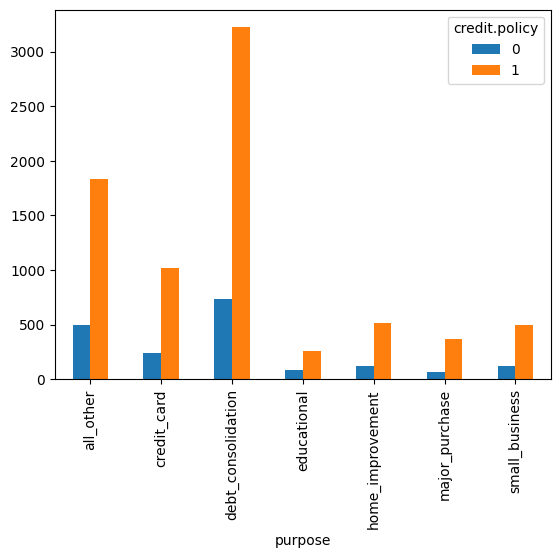

In [19]:
cross.plot(kind='bar')

In [20]:
kros = pd.crosstab(df['pub.rec'],df['credit.policy'])
kros

credit.policy,0,1
pub.rec,,
0,1716,7303
1,139,394
2,10,9
3,2,3
4,0,1
5,1,0


<Axes: xlabel='pub.rec'>

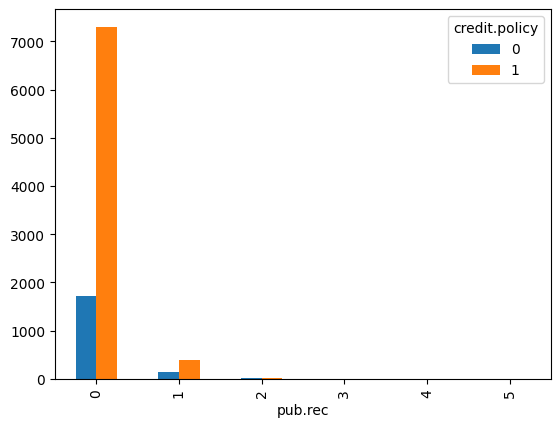

In [21]:
kros.plot(kind='bar') 

In [22]:
df.dtypes


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [23]:
print(df['purpose'].unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [24]:
df['installment'].describe()

count    9578.000000
mean      319.089413
std       207.071301
min        15.670000
25%       163.770000
50%       268.950000
75%       432.762500
max       940.140000
Name: installment, dtype: float64

In [25]:
df= pd.get_dummies(df,dtype=int,drop_first=True)

In [26]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [27]:
x = df["credit.policy"]
x.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [28]:
z=df.drop(columns='credit.policy')
z.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [29]:
z.shape

(9578, 18)

FINDING THE MOST IMPORTANT FEATURES

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
cls = ExtraTreesClassifier()
cls.fit(z,x)

ExtraTreesClassifier()

In [31]:
print(cls.feature_importances_)

[0.07411229 0.04078761 0.04178001 0.06082117 0.18492948 0.06993833
 0.08369108 0.04118425 0.32610349 0.01456621 0.00751952 0.01715631
 0.00799359 0.00886902 0.00447453 0.00533896 0.00398669 0.00674745]


<Axes: >

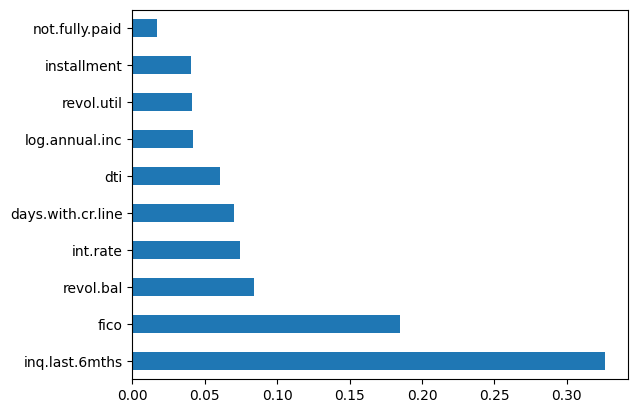

In [32]:
ranks = pd.Series(cls.feature_importances_,index=z.columns)
ranks.nlargest(10).plot(kind='barh')

In [33]:
y = df[['inq.last.6mths','fico','revol.bal','int.rate','days.with.cr.line','dti',
         'log.annual.inc','installment','revol.util','not.fully.paid'
        ]]

In [34]:
#
y.columns

Index(['inq.last.6mths', 'fico', 'revol.bal', 'int.rate', 'days.with.cr.line',
       'dti', 'log.annual.inc', 'installment', 'revol.util', 'not.fully.paid'],
      dtype='object')

In [35]:
y.head()

,inq.last.6mths,fico,revol.bal,int.rate,days.with.cr.line,dti,log.annual.inc,installment,revol.util,not.fully.paid
0,0,737,28854,0.1189,5639.958333,19.48,11.350407,829.10,52.1,0
1,0,707,33623,0.1071,2760.000000,14.29,11.082143,228.22,76.7,0
2,1,682,3511,0.1357,4710.000000,11.63,10.373491,366.86,25.6,0
3,1,712,33667,0.1008,2699.958333,8.10,11.350407,162.34,73.2,0
4,0,667,4740,0.1426,4066.000000,14.97,11.299732,102.92,39.5,0


In [36]:
y = y.rename(columns={
    'inq.last.6mths':'inquiry',
    'revol.bal':'revolving_balance',
    'int.rate':'intrest_rate',
    'days.with.cr.line':'days',
    'log.annual.inc':'annual_income',
    'revol.util':'utilization_rate',
    'not.fully.paid':'fully_paid'
})

In [37]:
y.columns

Index(['inquiry', 'fico', 'revolving_balance', 'intrest_rate', 'days', 'dti',
       'annual_income', 'installment', 'utilization_rate', 'fully_paid'],
      dtype='object')

# MODEL CREATION

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(y,x)

In [39]:
x_train.shape

(7183, 10)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
##hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)] 
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [43]:
grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [44]:
model=RandomizedSearchCV(
    estimator = rfc,
    param_distributions=grid,
    n_iter = 10,
    cv=5,
    verbose = 2,
    random_state=42,
    n_jobs =1
)

In [45]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  35.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [46]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [47]:
y_pred = model.predict(x_test)

# MODEL EVALUATION

In [48]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [49]:
y_test[:10]

6261    1
4024    1
5444    1
6692    1
6885    1
2300    1
9465    0
5497    1
8359    0
8040    0
Name: credit.policy, dtype: int64

In [50]:
score = accuracy_score(y_pred,y_test)
score

0.9899791231732776

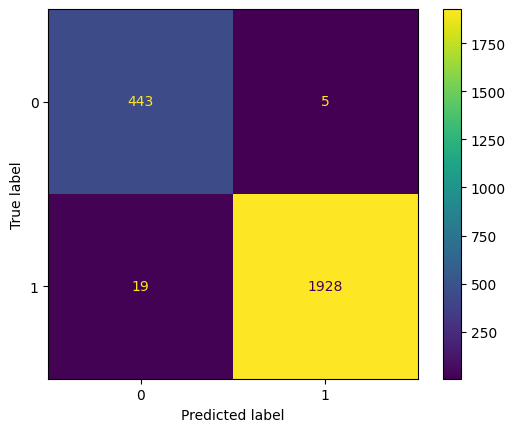

In [51]:
cm = confusion_matrix(y_pred,y_test)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [53]:
print(cm)

[[ 443    5]
 [  19 1928]]


In [52]:
import pickle
pickle.dump(model,open('model.pkl','wb'))